In [51]:
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm import tqdm # if we want a fancy progress bar!
import numpy.linalg as la

In [4]:
# recall the algorithm of gradient descent:
# goal: minimize a function, f
# method: given access to the derivative, f_prime
#   - pick a starting point, x = random, x = 0, whatever you think makes sense in situ
#   - repeat until "done"
#      - update x <- x - f_prime(x) * descent_rate
#      - optionally, update descent_rate, e.g. to slow down in later iterations

In [5]:
def grad_desc(f_prime):
    """ do grad descent using f_prime as access to the derivative at a point """
    x = 0.9
    old_x = 0
    learning_rate = 1
    while abs( x - old_x ) > 0.001:
        old_x = x
        x -= f_prime(x)*learning_rate
        learning_rate *= 0.9
#         print(x)
    return x
    

In [6]:
def x_squared_prime(x,a):
    """return derivative of f(x) = (x-a)**2 at x"""
    # return 2 * x # for x**2
    return 2*(x-a)

def x_cube_prime(x,a):
    """return derivative of f(x) = (x-a)**3 at x"""
    # return 2 * x # for x**2
    return 3 * (x-a)**2

In [7]:
def xsp_wrapper(x):
    return x_squared_prime(x,2)

In [8]:
# grad_desc(lambda x: x_squared_prime(x,2))
grad_desc(xsp_wrapper)

2.0000385373134706

In [9]:
# grad_desc(lambda x: x_cube_prime(x,0))

# Now with Linear Regression...

In [25]:
def bestFitGradientDescent(data, learn_rate = 1, iters = 1000, gamma = 1):
    """take in data as a list of (x,y) pairs and calculate alpha and beta of lobf"""
    alpha = 2
    beta = 2
    
    for _ in tqdm(range(iters)):
        alpha_grad = 0
        beta_grad = 0
#         print(f'alpha: {alpha}, beta: {beta}')
        # calculate the partial derivatives
        for row in data:
            alpha_grad += 2*( alpha * row[0] + beta - row[1] ) * row[0]
            beta_grad += 2* ( alpha * row[0] + beta - row[1] )
            
        # do our gradient descent step
        alpha -= learn_rate * alpha_grad
        beta -= learn_rate * beta_grad
        learn_rate *= gamma
    
    return alpha, beta

In [54]:
xs = np.arange(1,10,0.1)
points = np.array([ [x, x + np.random.normal(0,0.5)] for x in xs ])

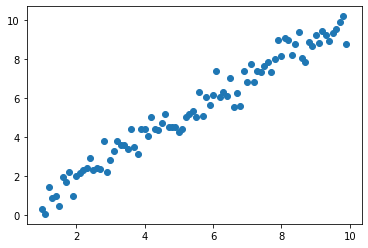

In [55]:
plt.scatter(points[:,0], points[:,1])

In [56]:
a,b = bestFitGradientDescent(points, 0.0001)

100%|██████████| 1000/1000 [00:00<00:00, 8921.32it/s]


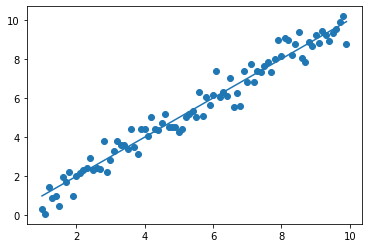

In [57]:
plt.scatter(points[:,0], points[:,1])
plt.plot(xs, [a*x + b for x in xs])

In [58]:
(a,b)

(1.0037779866007528, -0.028279059721270716)

## Analytic Solution

Given a matrix $X \in \mathbb{R}^{B \times d}$ of observation sites and vector $Y \in \mathbb{R}^{N}$ of observed values, we really want to find $\beta \in \mathbb{R}^{d}$ to be the vector of parameters of the linear model.

The error can now be written as $$\big|\big| X \beta - Y \big|\big|^2$$
Then we can do sone lin alg calculus, set error to 0 and solve, to get

$$\beta^* = (X^TX)^{-1}X^TY$$

In [59]:
X = np.copy(points)
X[:,1] = 1
Y = np.array([points[:,1]]).T

beta_star = la.inv(X.T @ X) @ X.T @ Y
beta_star

array([[ 1.01474227],
       [-0.10124802]])